# CNN for MNIST Handwritten Digit Classification

In [4]:
import tensorflow as tf

tf.__version__

'2.13.0'

In [5]:
mnist = tf.keras.datasets.mnist

In [6]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

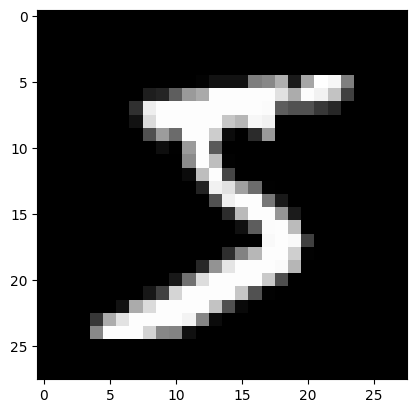

In [7]:
from matplotlib import pyplot as plt

plt.imshow(X_train[0], cmap='gray')
plt.show()

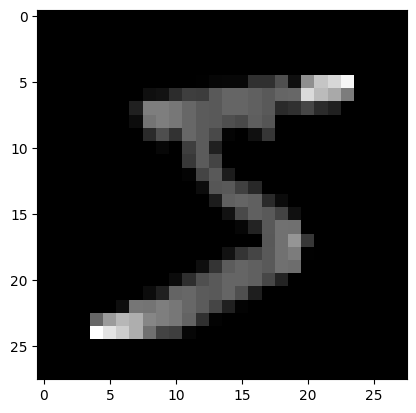

In [8]:
# normalize

X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

plt.imshow(X_train[0], cmap='gray')
plt.show()

In [9]:
# Model

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(X_train, y_train, epochs=3)

Epoch 1/3


2023-07-10 10:21:00.405752: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 8s 4ms/step - loss: 0.2631 - accuracy: 0.9213
Epoch 2/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1086 - accuracy: 0.9663
Epoch 3/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0740 - accuracy: 0.9766


In [10]:
val_loss, val_acc = model.evaluate(X_test, y_test)
print(val_loss, val_acc)

2023-07-10 10:21:21.871600: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


313/313 [==============================] - 1s 2ms/step - loss: 0.0943 - accuracy: 0.9697
0.09434126317501068 0.9696999788284302


In [11]:
model.save('digit_predictor.model')

INFO:tensorflow:Assets written to: digit_predictor.model/assets


INFO:tensorflow:Assets written to: digit_predictor.model/assets


In [12]:
new_model = tf.keras.models.load_model('digit_predictor.model')

In [13]:
predictions = new_model.predict([X_test])

313/313 [==============================] - 1s 2ms/step


In [14]:
import numpy as np

print(np.argmax(predictions[0]))

7


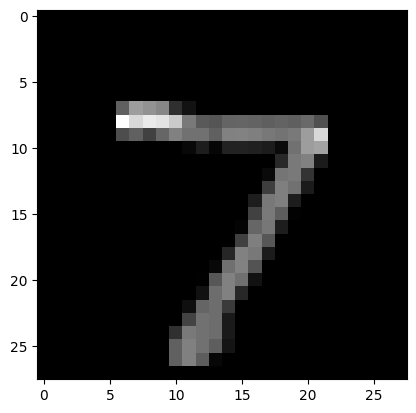

In [16]:
plt.imshow(X_test[0], cmap='gray')
plt.show()

In [17]:
X_test.shape

(10000, 28, 28)